In [ ]:
import os
import pandas as pd

# 폴더 경로 설정 (해당 경로를 변경하세요)
folder_path = "C:/Users/user/Desktop/포폴.v2/원본_급여대장"
output_folder_path = os.path.join(folder_path, "처리된_급여대장2")
os.makedirs(output_folder_path, exist_ok=True)  # 출력 폴더 생성

# 폴더 내의 모든 급여대장 파일 처리
for file_name in os.listdir(folder_path):
    if file_name.startswith("2024") and file_name.endswith(".xlsx"):
        file_path = os.path.join(folder_path, file_name)

        # 엑셀 파일 로드 (header=None을 사용해 모든 데이터를 읽어옵니다)
        df = pd.read_excel(file_path, header=None)

        # 엑셀의 1번부터 4번 행 삭제 (0부터 시작하는 인덱스 기준으로)
        df = df.iloc[4:].reset_index(drop=True)

        # 처리된 파일 저장
        output_file_path = os.path.join(output_folder_path, file_name)
        df.to_excel(output_file_path, index=False, header=False)

print("처리된 급여대장 파일이 생성되었습니다:", output_folder_path)


처리된 급여대장 파일이 생성되었습니다: C:/Users/user/Desktop/포폴.v2\처리된_급여대장2


In [ ]:
import os
import pandas as pd

# 처리된 급여대장 폴더 경로 설정
output_folder_path = "C:/Users/user/Desktop/포폴.v2/수정된_급여대장2"

# 처리된 폴더 내의 모든 급여대장 파일을 처리
for file_name in os.listdir(output_folder_path):
    if file_name.startswith("2024") and file_name.endswith(".xlsx"):
        file_path = os.path.join(output_folder_path, file_name)

        # 엑셀 파일 로드
        df = pd.read_excel(file_path)

        # "공제합계액" 컬럼 우측의 두 개의 공란 컬럼명을 수정
        공제합계액_index = df.columns.get_loc("공제합계액")  # "공제합계액"의 인덱스 찾기
        df.columns.values[공제합계액_index + 1] = "차인지급액"  # 첫 번째 공란 컬럼명 수정
        df.columns.values[공제합계액_index + 2] = "부양가족수"  # 두 번째 공란 컬럼명 수정

        # 수정된 파일 저장
        df.to_excel(file_path, index=False)

print("컬럼명이 수정된 파일들이 저장되었습니다:", output_folder_path)



컬럼명이 수정된 파일들이 저장되었습니다: C:/Users/user/Desktop/포폴.v2/처리된_급여대장2


In [ ]:
import os
import pandas as pd

# 처리된 급여대장 폴더 경로 설정
output_folder_path = "C:/Users/user/Desktop/포폴.v2/수정된_급여대장2"

# 처리된 폴더 내의 모든 급여대장 파일을 처리
for file_name in os.listdir(output_folder_path):
    if file_name.startswith("2024") and file_name.endswith(".xlsx"):
        file_path = os.path.join(output_folder_path, file_name)

        # 엑셀 파일 로드
        df = pd.read_excel(file_path)

        # 파일명에서 "2024.00" 부분 추출
        지급년월 = file_name.split(" ")[0]  # 파일명의 첫 번째 부분인 "2024.00" 추출

        # "지급년월" 컬럼 추가
        df["지급년월"] = 지급년월

        # 수정된 파일 저장
        df.to_excel(file_path, index=False)

print("지급년월 컬럼이 추가된 파일들이 저장되었습니다:", output_folder_path)


지급년월 컬럼이 추가된 파일들이 저장되었습니다: C:/Users/user/Desktop/포폴.v2/처리된_급여대장2


In [ ]:
import os
import pandas as pd

# 폴더 경로 설정 (변경 필요)
folder_path = "C:/Users/user/Desktop/포폴.v2/수정된_급여대장2"
output_file_path = os.path.join(folder_path, "2024_급여대장.xlsx")
reference_file_path = os.path.join(folder_path, "C:/Users/user/Desktop/포폴.v2/피처견본/피처견본.xlsx")

# 기준 파일 로드
reference_df = pd.read_excel(reference_file_path)
reference_columns = reference_df.columns

# 병합할 데이터를 담을 리스트
merged_data = []

# 폴더 내의 모든 파일을 처리
for file_name in os.listdir(folder_path):
    if file_name.startswith("2024") and file_name.endswith(".xlsx"):
        file_path = os.path.join(folder_path, file_name)

        # 엑셀 파일 로드
        df = pd.read_excel(file_path)

        # 기준 컬럼을 기반으로 데이터프레임 재정렬, 없는 컬럼은 추가하고 값을 0으로 채움
        df = df.reindex(columns=reference_columns, fill_value=0)

        # 병합할 데이터를 리스트에 추가
        merged_data.append(df)

# 모든 데이터를 하나의 DataFrame으로 병합
final_df = pd.concat(merged_data, ignore_index=True)

# 병합된 데이터 엑셀 파일로 저장
final_df.to_excel(output_file_path, index=False)

print("병합된 급여대장 파일이 생성되었습니다:", output_file_path)


병합된 급여대장 파일이 생성되었습니다: C:/Users/user/Desktop/포폴.v2/처리된_급여대장2\2024_급여대장.xlsx


In [ ]:
import pandas as pd

# 병합된 파일 경로 설정 (변경 필요)
merged_file_path = "C:/Users/user/Desktop/포폴.v2/수정된_급여대장2/2024_급여대장.xlsx"

# 병합된 엑셀 파일 로드
df = pd.read_excel(merged_file_path)

# "부서", "성명", "직급", "입사일" 컬럼에 값이 없는 행 삭제
df = df.dropna(subset=["부서", "성명", "직급", "입사일"])

# 수정된 파일 저장
df.to_excel(merged_file_path, index=False)

print("값이 없는 행이 삭제된 병합된 급여대장 파일이 저장되었습니다:", merged_file_path)


값이 없는 행이 삭제된 병합된 급여대장 파일이 저장되었습니다: C:/Users/user/Desktop/포폴.v2/처리된_급여대장2/2024_급여대장.xlsx


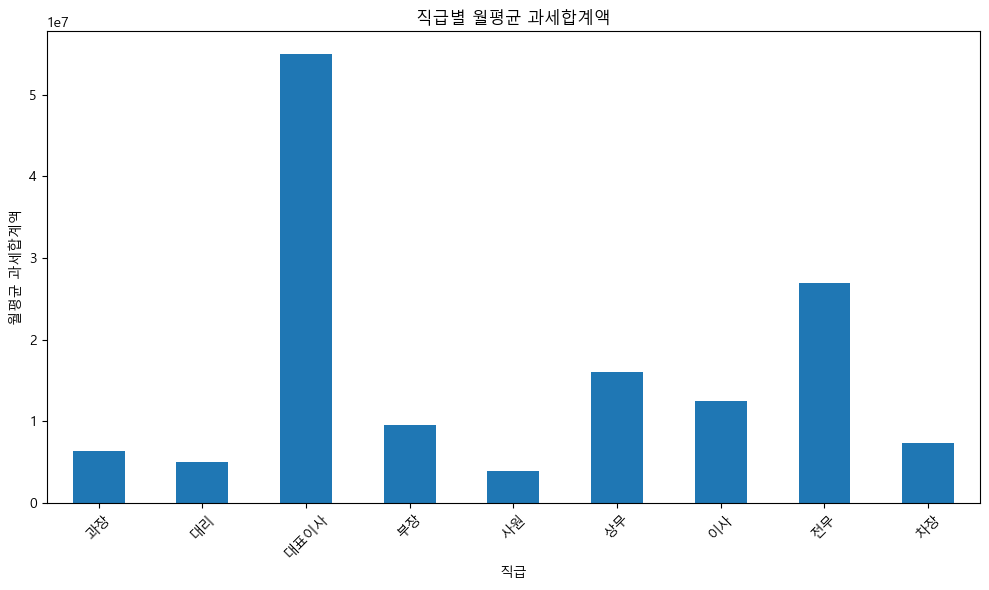

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우의 경우 'Malgun Gothic', 맥의 경우 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# 병합된 파일 경로 설정 (변경 필요)
merged_file_path = "C:/Users/user/Desktop/포폴.v2/처리된_급여대장2/2024_급여대장.xlsx"

# 병합된 엑셀 파일 로드
df = pd.read_excel(merged_file_path)

# "과세합계액"을 숫자로 변환 (필요한 경우)
df["과세합계액"] = pd.to_numeric(df["과세합계액"], errors='coerce')

# 직급별 월평균 "과세합계액" 계산
average_taxable_amount = df.groupby("직급")["과세합계액"].mean()

# 시각화
plt.figure(figsize=(10, 6))
average_taxable_amount.plot(kind='bar')
plt.title("직급별 월평균 과세합계액")
plt.xlabel("직급")
plt.ylabel("월평균 과세합계액")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


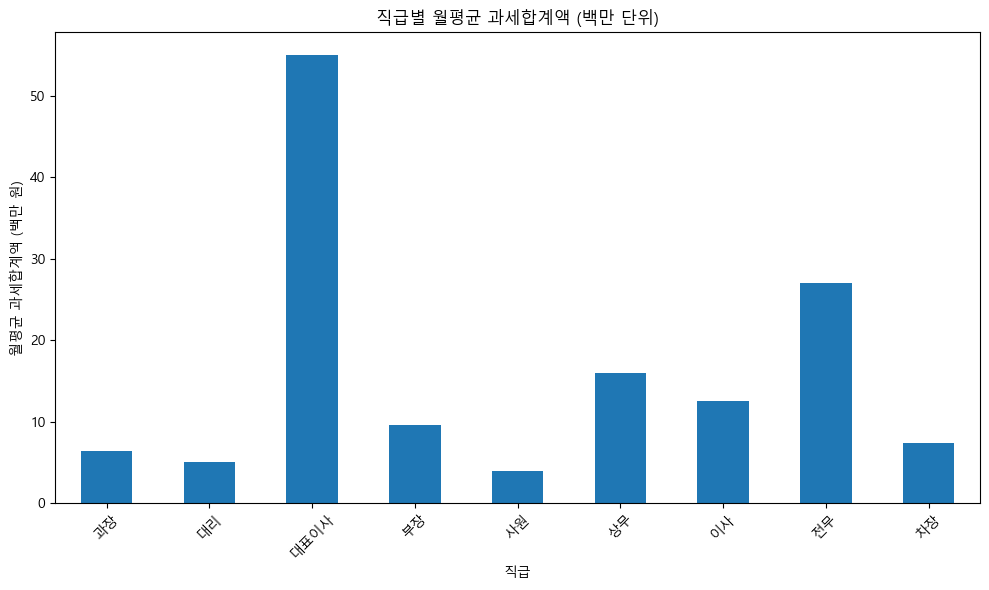

In [13]:
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우의 경우 'Malgun Gothic', 맥의 경우 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# 병합된 파일 경로 설정 (변경 필요)
merged_file_path = "C:/Users/user/Desktop/포폴.v2/처리된_급여대장2/2024_급여대장.xlsx"

# 병합된 엑셀 파일 로드
df = pd.read_excel(merged_file_path)

# "과세합계액"을 숫자로 변환 (필요한 경우)
df["과세합계액"] = pd.to_numeric(df["과세합계액"], errors='coerce')

# 직급별 월평균 "과세합계액" 계산 후 백만 단위로 변환
average_taxable_amount = df.groupby("직급")["과세합계액"].mean() / 1_000_000

# 시각화
plt.figure(figsize=(10, 6))
average_taxable_amount.plot(kind='bar')
plt.title("직급별 월평균 과세합계액 (백만 단위)")
plt.xlabel("직급")
plt.ylabel("월평균 과세합계액 (백만 원)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()